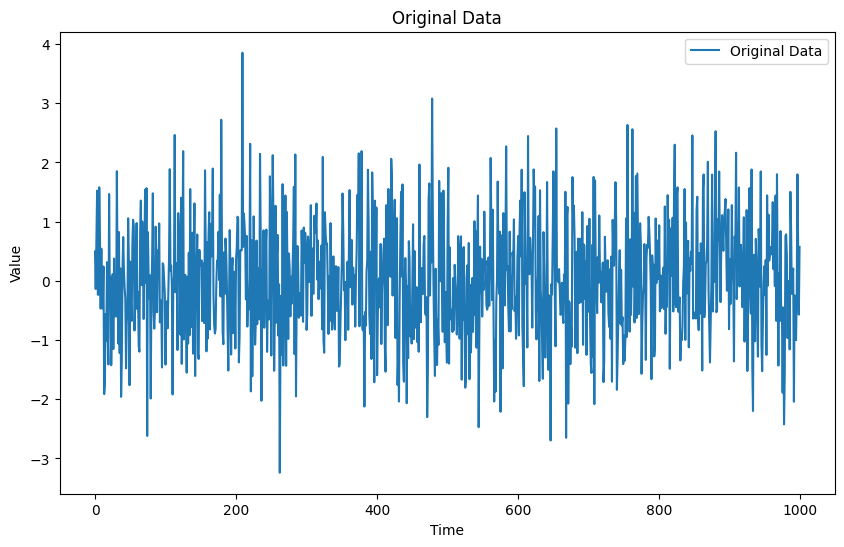

Epoch 1/50
23/23 [==============================] - 8s 85ms/step - loss: 0.0476 - val_loss: 0.0187
Epoch 2/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0239 - val_loss: 0.0183
Epoch 3/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0211 - val_loss: 0.0240
Epoch 4/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0250 - val_loss: 0.0189
Epoch 5/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0230 - val_loss: 0.0183
Epoch 6/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0219 - val_loss: 0.0181
Epoch 7/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0218 - val_loss: 0.0180
Epoch 8/50
23/23 [==============================] - 1s 46ms/step - loss: 0.0221 - val_loss: 0.0182
Epoch 9/50
23/23 [==============================] - 1s 47ms/step - loss: 0.0220 - val_loss: 0.0179
Epoch 10/50
23/23 [==============================] - 1s 42ms/step - loss: 0.0222 - val_loss: 0.0180
Epoch 11/

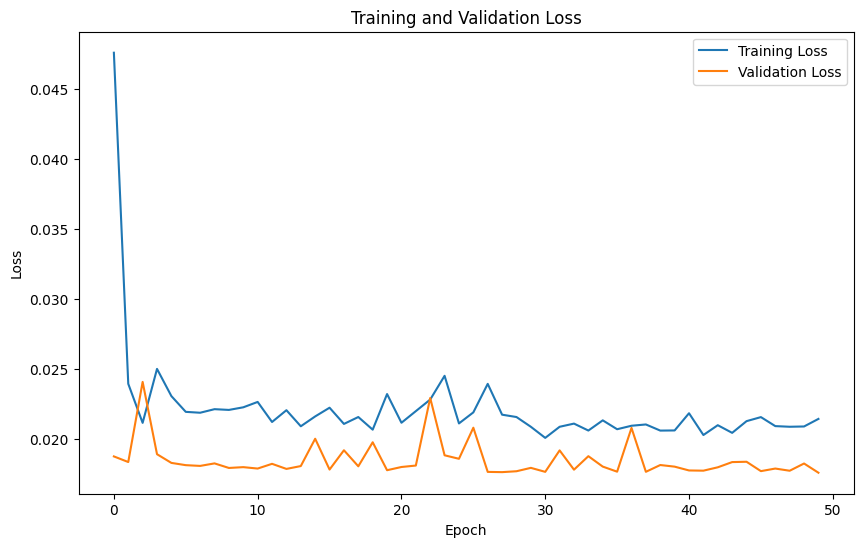

7/7 [==============================] - 1s 8ms/step
Mean Absolute Error (MAE): 0.7761937040288686
Mean Squared Error (MSE): 0.9353650919510474
Root Mean Squared Error (RMSE): 0.9671427464190834


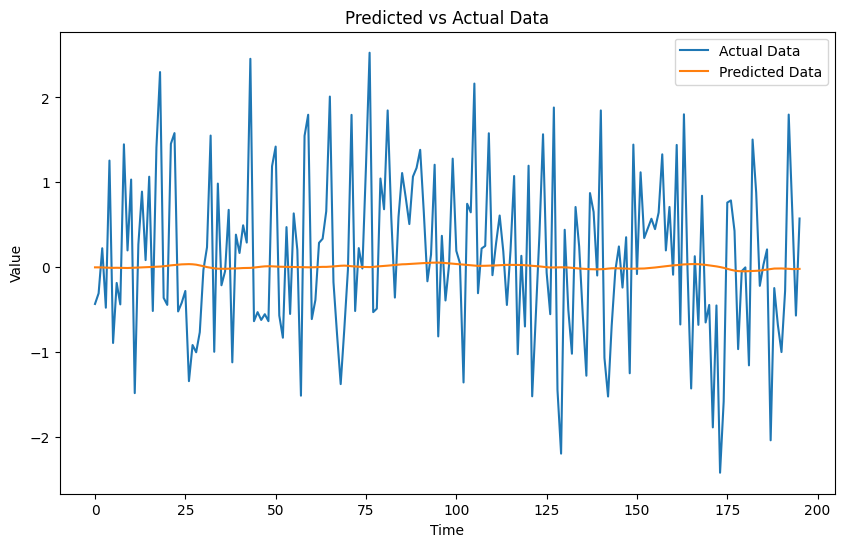

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic data for demonstration
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=(1000, 1))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences and labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 20

# Create sequences and labels
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Plotting training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Data')
plt.plot(predictions, label='Predicted Data')
plt.title('Predicted vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [6]:
# Adjusting the model architecture
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=1)
])

# Compiling the model with a lower learning rate and different optimizer
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Training the model with a larger batch size and longer epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/100
12/12 [==============================] - 10s 226ms/step - loss: 0.0749 - val_loss: 0.0254
Epoch 2/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0239 - val_loss: 0.0202
Epoch 3/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0221 - val_loss: 0.0181
Epoch 4/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0217 - val_loss: 0.0185
Epoch 5/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0237 - val_loss: 0.0199
Epoch 6/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0224 - val_loss: 0.0201
Epoch 7/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0222 - val_loss: 0.0187
Epoch 8/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0219 - val_loss: 0.0217
Epoch 9/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0226 - val_loss: 0.0181
Epoch 10/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0231 - val_loss: 0

In [8]:
# Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



7/7 [==============================] - 0s 16ms/step
Mean Absolute Error (MAE): 42.63641796709702
Mean Squared Error (MSE): 2716.1063713064887
Root Mean Squared Error (RMSE): 52.11627741221056
